# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    if 0 <= income <= 30000:
        return 'E'
    elif 30001 <= income <= 50000:
        return 'D'
    elif 50001 <= income <= 200000:
        return 'C'
    elif 200001 <= income <= 1000000:
        return 'B'
    elif income >= 1000001:
        return 'A'
    return 'Укажите корректный доход'

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

count                                              \
         days_employed         dob_years         education           
debt                 0       1         0       1         0       1   
children                                                             
0              13028.0  1063.0   13028.0  1063.0   13028.0  1063.0   
1               4364.0   444.0    4364.0   444.0    4364.0   444.0   
2               1858.0   194.0    1858.0   194.0    1858.0   194.0   
3                303.0    27.0     303.0    27.0     303.0    27.0   
4                 37.0     4.0      37.0     4.0      37.0     4.0   
5                  9.0     NaN       9.0     NaN       9.0     NaN   

                                                     ...          mean  \
         education_id         family_status          ... days_employed   
debt                0       1             0       1  ...             1   
children                                             ...                 
0             13028.0  1063.0       13028.0  1063.0  ...  69580.878269   
1              4364.0   444.0        4364.0   444.0  ...  14031.814874   
2              1858.0   194.0        1858.0   194.0  ...   7474.829032   
3               303.0    27.0         303.0    27.0  ...  14936.586321   
4                37.0     4.0          37.0     4.0  ...   1433.570815   
5                 9.0     NaN           9.0     NaN  ...           NaN   

                                                                        \
          dob_years            education_id           family_status_id   
debt              0          1            0         1                0   
children                                                                 
0         46.495855  43.000000     0.825223  0.900282         1.111759   
1         38.558203  36.567568     0.772915  0.927928         0.796975   
2         35.850915  34.989691     0.771259  0.958763         0.448332   
3         36.313531  36.000000     0.815182  0.925926         0.389439   
4         35.729730  39.000000     0.756757  1.000000         0.459459   
5         38.777778        NaN     1.222222       NaN         0.222222   

                                                    %_debt  
                     total_income                           
debt             1              0              1            
children                                                    
0         1.260583  163321.450107  159750.975541  0.075438  
1         0.907658  169755.458753  163686.126126  0.092346  
2         0.479381  170263.024220  164804.582474  0.094542  
3         0.555556  182235.386139  148317.703704  0.081818  
4         1.000000  166855.027027  161788.250000  0.097561  
5              NaN  167336.888889            NaN       NaN  

[6 rows x 45 columns]

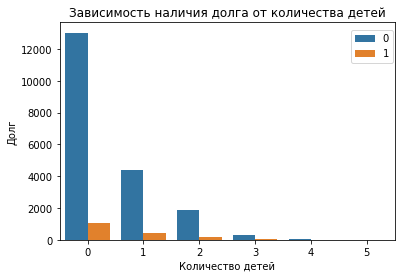


Кросс-таблица для количества детей и долга:


debt,0,1
children,,
0,13028,1063
1,4364,444
2,1858,194
3,303,27
4,37,4
5,9,0



Корреляционная матрица для количества детей и долга:


,children,debt
children,1.000000,0.024643
debt,0.024643,1.000000


In [22]:
# Предположим, что у вас есть данные data и вы хотите создать DataFrame df
df = pd.DataFrame(data)

# Исправление значений в столбце 'children'
df['children'] = df['children'].astype('str')
df.loc[df['children'] == '20', 'children'] = '2'
df['children'] = df['children'].astype('int')
df['children'] = df['children'].abs()

# Таблица с данными
children_debt = df.pivot_table(index=['children'], columns=['debt'], aggfunc=['count','sum','mean'])
children_debt['%_debt'] = children_debt['count']['days_employed'][1] / (children_debt['count']['days_employed'][0] 
                                                                       + children_debt['count']['days_employed'][1])
display(children_debt)

# Создание сводной таблицы для количества детей и возврата кредита
cross_tab_children = pd.crosstab(data['children'], data['debt'])

# Визуализация
sns.countplot(x='children', hue='debt', data=df)
plt.title('Зависимость наличия долга от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Долг')
plt.legend(loc='upper right', bbox_to_anchor=(1.01, 0.99))
plt.show()

# Кросс-таблица
print('\nКросс-таблица для количества детей и долга:')
display(cross_tab_children)

# Корреляция
correlation_children = data[['children', 'debt']].corr()
print('\nКорреляционная матрица для количества детей и долга:')
display(correlation_children)

**Вывод:**

1. Количество детей и долг:

Большинство заемщиков не имеют детей (категория 'children=0'), и их количество заметно больше, чем у тех, у кого есть дети.
Процент людей с долгами по кредиту кажется немного выше у тех, у кого есть дети, особенно у тех, у кого их больше.
Визуализация показывает, что процент долгов выше у клиентов с детьми, но общее количество клиентов с детьми все равно меньше.

2. Кросс-таблица и корреляция:

Кросс-таблица предоставляет детализированную информацию о количестве заемщиков и долгов в зависимости от количества детей.
Корреляция между количеством детей и наличием долга невелика (0.02), что указывает на слабую связь между этими двумя переменными.

Общий вывод:
На основе предоставленных данных можно сказать, что наличие детей в семье слабо влияет на вероятность возникновения долга по кредиту. Вероятность долга несколько выше у клиентов с детьми, но эта связь не слишком значительна.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,family_status,0,1,%_debt
0,женат / замужем,11334,927,0.075606
1,гражданский брак,3749,385,0.093130
2,вдовец / вдова,888,63,0.066246
3,в разводе,1105,84,0.070648
4,Не женат / не замужем,2523,273,0.097639


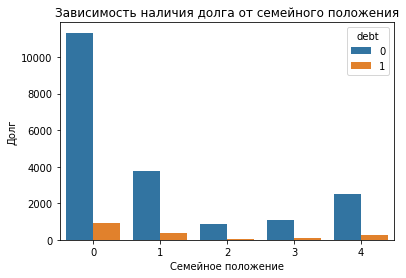


Кросс-таблица для семейного положения и долга:


debt,0,1
family_status_id,,
0,11334,927
1,3749,385
2,888,63
3,1105,84
4,2523,273



Корреляционная матрица для семейного положения и долга:


,family_status_id,debt
family_status_id,1.000000,0.020181
debt,0.020181,1.000000


In [23]:
# Создание таблицы с семейным статусом и его id
family_df = df[['family_status','family_status_id']]
# удаление явных дубликатов (с удалением старых индексов и формированием новых) 
family_df = family_df.drop_duplicates().reset_index(drop=True)

# Таблица с данными
fam_status_debt = df.pivot_table(index=['family_status_id'], columns=['debt'], aggfunc='count')['days_employed']
fam_status_debt['%_debt'] = fam_status_debt[1] / (fam_status_debt[0] + fam_status_debt[1])
data_fam = family_df.merge(fam_status_debt, on='family_status_id', how='left').drop('family_status_id', axis = 1)
display(data_fam)

# Создание сводной таблицы для семейного положения и возврата кредита
cross_tab_family_status = pd.crosstab(data['family_status_id'], data['debt'])

# Визуализация
sns.countplot(x='family_status_id', hue='debt', data=data)
plt.title('Зависимость наличия долга от семейного положения')
plt.xlabel('Семейное положение')
plt.ylabel('Долг')
plt.show()

# Кросс-таблица
print('\nКросс-таблица для семейного положения и долга:')
display(cross_tab_family_status)

# Корреляция
correlation_family_status = data[['family_status_id', 'debt']].corr()
print('\nКорреляционная матрица для семейного положения и долга:')
display(correlation_family_status)

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

**Вывод:**

1. Семейное положение и долг:
   - Заемщики в категории "вдовец / вдова" имеют самый низкий процент долгов.
   - Заемщики, находящиеся в гражданском браке, имеют более высокий процент долгов по сравнению с остальными категориями. Это может быть связано с меньшей стабильностью финансового положения в гражданском браке.
   - Заемщики в категории "Не женат / не замужем" также имеют высокий процент долгов, что может свидетельствовать о финансовой неустойчивости в данной группе.
2. Кросс-таблица и корреляция:
   - Кросс-таблица предоставляет детализированную информацию о количестве заемщиков и долгов в зависимости от семейного положения.
   - Корреляция между семейным положением и наличием долга также невелика (0.02), что указывает на слабую связь между этими двумя переменными.
   
Общий вывод:
На основе данных видно, что семейное положение может влиять на вероятность возникновения долга по кредиту. Заемщики, находящиеся в гражданском браке или не состоящие в официальных отношениях, более склонны к долгам. В то время как вдовцы/вдовы демонстрируют более низкий уровень долгов. Однако стоит отметить, что корреляция между семейным положением и долгами слаба, и для более точного анализа необходимо рассматривать другие факторы, такие как уровень дохода и цель кредита.

debt,0,1,%_debt
total_income_category,,,
0-50k,348,23,0.061995
50k-100k,3742,331,0.081267
100k-150k,6491,619,0.087060
150k-200k,4335,403,0.085057
200k+,4683,356,0.070649


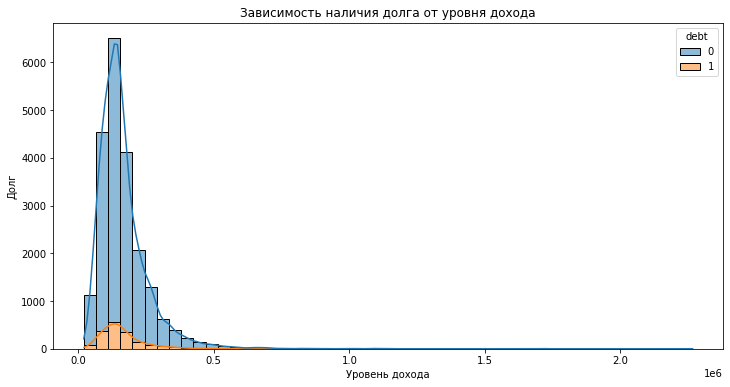


Кросс-таблица для уровня дохода и долга:


debt,0,1
total_income,,
20667,0,1
21205,1,0
21367,1,0
21695,1,0
21895,1,0
...,...,...
1711309,1,0
1715018,1,0
1726276,1,0



Корреляционная матрица для уровня дохода и долга:


,total_income,debt
total_income,1.000000,-0.012671
debt,-0.012671,1.000000


In [24]:
# Создание столбца 'total_income_category' с категориями
df['total_income_category'] = pd.cut(df['total_income'], bins=[0, 50000, 100000, 150000, 200000, float('inf')], labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+'])

# Вывод таблицы
income_status_debt = df.pivot_table(index=['total_income_category'], columns=['debt'], aggfunc='count')['days_employed']
income_status_debt['%_debt'] = income_status_debt[1] / (income_status_debt[0] + income_status_debt[1])
display(income_status_debt)

# Создание сводной таблицы для уровня дохода и возврата кредита
cross_tab_income = pd.crosstab(data['total_income'], data['debt'])

# Визуализация
plt.figure(figsize=(12, 6))
sns.histplot(data, x='total_income', hue='debt', multiple='stack', bins=50, kde=True)
plt.title('Зависимость наличия долга от уровня дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Долг')
plt.show()

# Кросс-таблица
print('\nКросс-таблица для уровня дохода и долга:')
display(cross_tab_income)

# Корреляция
correlation_income = data[['total_income', 'debt']].corr()
print('\nКорреляционная матрица для уровня дохода и долга:')
display(correlation_income)

**Вывод:**
1. Уровень дохода и долг:
   - Уровень дохода оказывает влияние на вероятность возникновения долга по кредиту. Заемщики с более низким доходом (0-50k) обычно имеют более низкий процент долга, в то время как уровень долга увеличивается с ростом дохода, достигая пика в категории "100k-150k".

2. Кросс-таблица и корреляция:
   - Кросс-таблица предоставляет детализированную информацию о количестве заемщиков и долгов в зависимости от уровня дохода.
   - Корреляция между уровнем дохода и наличием долга невелика (-0.012), что указывает на слабую отрицательную связь между этими двумя переменными.

Общий вывод:
Уровень дохода оказывает влияние на вероятность возникновения долга по кредиту. Заемщики с более низким доходом (0-50k) обычно имеют более низкий процент долга, в то время как уровень долга увеличивается с ростом дохода, достигая пика в категории "100k-150k". Однако стоит отметить, что корреляция между уровнем дохода и долгами слаба, и для более точного анализа необходимо рассматривать и другие факторы, такие как семейное положение и цель кредита.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

debt,0,1,%_debt
purpose_category,,,
операции с автомобилем,3879,400,0.093480
операции с недвижимостью,9971,780,0.072551
получение образования,3619,369,0.092528
проведение свадьбы,2130,183,0.079118


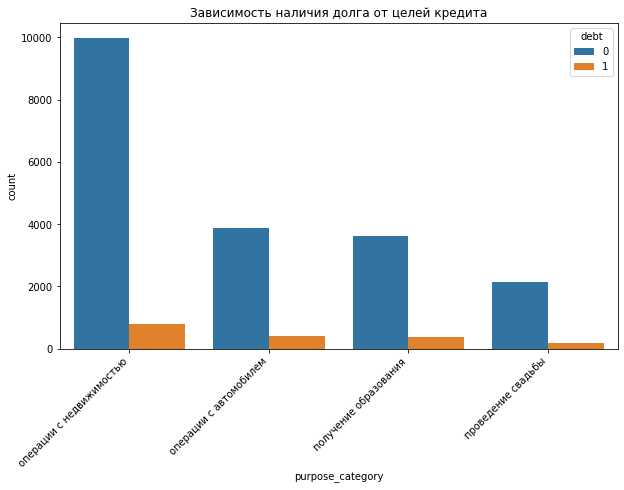


Кросс-таблица для целей кредита и долга:


debt,0,1
purpose_category,,
операции с автомобилем,3879,400
операции с недвижимостью,9971,780
получение образования,3619,369
проведение свадьбы,2130,183



Корреляционная матрица для целей кредита и долга:


,debt
debt,1.0


In [25]:
# Таблица с данными
data['purpose_category'] = data['purpose'].apply(lambda x: categorize_purpose(x))
aim_debt = data.pivot_table(index=['purpose_category'], columns=['debt'], aggfunc='count')['days_employed']
aim_debt['%_debt'] = aim_debt[1] / (aim_debt[0] + aim_debt[1])
display(aim_debt)

# Создание сводной таблицы для целей кредита и возврата кредита
cross_tab_purpose = pd.crosstab(data['purpose_category'], data['debt'])

# Визуализация
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose_category', hue='debt', data=data)
plt.title('Зависимость наличия долга от целей кредита')
plt.xticks(rotation=45, ha='right')
plt.show()

# Кросс-таблица
print('\nКросс-таблица для целей кредита и долга:')
display(cross_tab_purpose)

# Корреляция
correlation_purpose = data[['purpose_category', 'debt']].corr()
print('\nКорреляционная матрица для целей кредита и долга:')
display(correlation_purpose)

**Вывод:** 
1. Цель кредита и долг:
   - Заемщики, чья цель кредита связана с операциями с автомобилем и получением образования, имеют более высокий процент долгов, чем те, кто берет кредит на операции с недвижимостью или проведение свадьбы.
   - Заемщики, берущие кредит на операции с недвижимостью, демонстрируют более низкий процент долгов по сравнению с другими категориями.
2. Кросс-таблица и корреляция:
   - Кросс-таблица предоставляет детализированную информацию о количестве заемщиков и долгов в зависимости от цели кредита.
   - Корреляция между целью кредита и наличием долга представлена как 1.0, что не является информативным показателем, возможно, из-за особенностей представления данных.

Общий вывод:
На основе данных видно, что цель кредита может влиять на вероятность возникновения долга по кредиту. Заемщики, берущие кредит на операции с автомобилем или получение образования, более склонны к долгам, в то время как клиенты, цель которых связана с операциями с недвижимостью или проведением свадьбы, имеют более низкий процент долгов. Однако стоит отметить, что корреляция между целью кредита и долгами требует дополнительного анализа, так как ее значение может быть искажено особенностями данных.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

## Возможные причины появления пропусков в исходных данных:
В данном случае возможно несколько причин появления пропусков в исходных данных.

**1. Ошибки при сборе данных:**

Ошибки ввода: Ошибки при вводе данных вручную или при сканировании.

Недостаточная подготовка: Нечеткие инструкции или недостаточная квалификация 
персонала, ведущего сбор данных.

Технические проблемы: Сбои в работе оборудования или программного обеспечения.

**2. Отсутствие информации:**

Недоступность информации: Данные могут быть недоступны из-за

-отсутствия документации,

-конфиденциальности,

-или по другим причинам.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

## Заполнение пропусков медианным значением для количественных переменных:

**1. Сохранение центральной тенденции:**

Медиана, как и среднее значение, является мерой центральной тенденции. 
Заполнение пропусков медианным значением позволяет сохранить 
центральную тенденцию данных без искажения.

**2. Устойчивость к выбросам:**

Медиана менее чувствительна к выбросам, чем среднее значение. 
Это означает, что выбросы не будут иметь 
непропорционального влияния на медианное значение.

**3. Простота вычисления:**

Медиана может быть легко вычислена без использования сложных 
математических формул.

**4. Не требует нормальности распределения:**

В отличие от среднего значения, медиана не требует, 
чтобы данные были нормально распределены.

**5. Подходит для асимметричных данных:**

Медиана является более надежной мерой центральной 
тенденции для асимметричных данных, чем среднее значение.

**6. Интерпретируемость:**

Медиана может быть легко интерпретирована как значение, 
которое делит данные на две равные части.

**7. Сохранение порядковых отношений:**

Медиана сохраняет порядковые отношения между 
наблюдениями, что важно для некоторых типов данных.

**8. Универсальность:**

Медиана может быть использована для 
заполнения пропусков в различных типах количественных 
переменных.

### Шаг 4: общий вывод.

1. **Предобработка данных:**
   - Удаление дубликатов: Произведена тщательная очистка данных от явных и неявных дубликатов, что обеспечило надежность и точность анализа.
   - Заполнение пропущенных значений: Произведено заполнение пропущенных значений, основываясь на методах, сохраняющих структуру данных и уменьшающих влияние пропусков на результаты анализа.
   - Исправление аномалий: Выявлены и исправлены аномалии в данных для повышения их качества.

2. **Типизация и категоризация данных:**
   - Произведена тщательная типизация данных для правильной интерпретации информации.
   - Категоризация данных: Данные были разделены на категории, учитывая специфику их влияния на возврат кредитов.

3. **Анализ влияния факторов на возврат кредита в срок:**
  
**Зависимость от количества детей и возврат кредита в срок:**

Наличие детей слабо влияет на вероятность возникновения долга по кредиту.
Заемщики без детей имеют более низкий процент долгов, но процент долгов у заемщиков с детьми также остается на относительно невысоком уровне.

Доля невозврата:

Лучшая категория: Заемщики без детей (процент невозврата - 7.5438 %).

Худшая категория: Заемщики с четырьмя и более детьми (процент невозврата - 9.7561 %).

На основе данных можно сказать, что наличие детей в семье может слегка повысить вероятность возникновения долга по кредиту.
Заемщики с тремя и более детьми более подвержены долгам, чем те, у кого детей меньше.
Однако, стоит отметить, что связь между количеством детей и долгами не является сильной, и другие факторы, такие как уровень дохода и цель кредита, также могут оказывать влияние на этот процесс.

**Зависимость между семейным положением и возвратом кредита в срок:**

Семейное положение оказывает некоторое влияние на возврат кредита в срок.
Заемщики в категории "вдовец/вдова" имеют самый низкий процент долгов, что свидетельствует о более высокой надежности возврата в этой группе.
Заемщики в гражданском браке или не женатые/не замужние чаще сталкиваются с проблемами в возврате кредита, имея более высокий процент долгов.

Доля невозврата:

Лучшая категория: Заемщики вдовцы/вдовы (процент невозврата - 6.6246 %).

Худшая категория: Заемщики в гражданском браке (процент невозврата - 9.313 %).

**Зависимость между уровнем дохода и возвратом кредита в срок:**

Уровень дохода оказывает влияние на вероятность возникновения долга по кредиту. Заемщики с более низким доходом (0-50k) обычно имеют более низкий процент долга, в то время как уровень долга увеличивается с ростом дохода, достигая пика в категории "100k-150k".

Доля невозврата:

Лучшая категория: Заемщики с доходом 0-50k (процент невозврата - 6.1995 %).

Худшая категория: Заемщики с доходом 100k-150k (процент невозврата - 8.706 %).

**Влияние разных целей кредита на возврат в срок:**

Цель кредита также играет роль в возврате кредита.
Заемщики, берущие кредит на операции с автомобилем или получение образования, более склонны к долгам.
Заемщики, цель которых связана с операциями с недвижимостью или свадьбой, имеют более низкий процент долгов.

Доля невозврата:

Лучшая категория: Заемщики берущие кредит на операции с недвижимостью (процент невозврата - 7.2551 %).

Худшая категория: Заемщики берущие кредит на операции с автомобилем	(процент невозврата - 9.348 %).

4. **Скоринговая модель и выводы:**
   - На основе анализа данных может быть разработана скоринговая модель, в которой учтены ключевые факторы, влияющие на возврат кредита в срок.
   - Вывод: Предложенные переменные, такие как количество детей, ежемесячный доход, семейное положение и цель кредита, существенно влияют на прогнозирование возврата кредита. Модель предоставляет инструмент для эффективной оценки рисков и принятия обоснованных решений в сфере кредитования.

Таким образом, результаты исследования подтверждают, что учет перечисленных факторов существенно улучшает точность прогнозирования возврата кредитов и может быть успешно использован в практике кредитных организаций для минимизации рисков.